# Schwarzschild horizon in 3+1 Eddington-Finkelstein coordinates


This Jupyter/SageMath worksheet is relative to the lectures
[Geometry and physics of black holes](http://luth.obspm.fr/~luthier/gourgoulhon/bh16/)
  
These computations are based on [SageManifolds](http://sagemanifolds.obspm.fr) (v0.9)

The worksheet file (ipynb format) can be downloaded from [here](https://raw.githubusercontent.com/egourgoulhon/BHLectures/master/sage/Schwarzschild_horizon.ipynb). To run it, you must start SageMath with the Jupyter notebook, with the command `sage -n jupyter`



First we set up the notebook to display mathematical objects using LaTeX formatting:

In [1]:
%display latex

## Spacetime

We declare the spacetime manifold $M$:

In [2]:
M = Manifold(4, 'M')
print M

4-dimensional differentiable manifold M


and the 3+1 Eddington-Finkelstein coordinates $(t,r,\theta,\phi)$ as a chart on $M$:

In [3]:
X.<t,r,th,ph> = M.chart(r't r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\phi')
X

Chart (M, (t, r, th, ph))

The mass parameter and the metric:

In [4]:
var('m', domain='real')
assume(m>=0)

In [5]:
g = M.lorentzian_metric('g')
g[0,0] = -(1-2*m/r)
g[0,1] = 2*m/r
g[1,1] = 1+2*m/r
g[2,2] = r^2
g[3,3] = (r*sin(th))^2
g.display()

g = (2*m - r)/r dt*dt + 2*m/r dt*dr + 2*m/r dr*dt + (2*m + r)/r dr*dr + r^2 dth*dth + r^2*sin(th)^2 dph*dph

In [6]:
g[:]

[  (2*m - r)/r         2*m/r             0             0]
[        2*m/r   (2*m + r)/r             0             0]
[            0             0           r^2             0]
[            0             0             0 r^2*sin(th)^2]

In [7]:
g.inverse()[:]

[     -(2*m + r)/r             2*m/r                 0                 0]
[            2*m/r      -(2*m - r)/r                 0                 0]
[                0                 0            r^(-2)                 0]
[                0                 0                 0 1/(r^2*sin(th)^2)]

In [8]:
g.christoffel_symbols_display()

Gam^t_t,t = 2*m^2/r^3 
Gam^t_t,r = (2*m^2 + m*r)/r^3 
Gam^t_r,r = 2*(m^2 + m*r)/r^3 
Gam^t_th,th = -2*m 
Gam^t_ph,ph = -2*m*sin(th)^2 
Gam^r_t,t = -(2*m^2 - m*r)/r^3 
Gam^r_t,r = -2*m^2/r^3 
Gam^r_r,r = -(2*m^2 + m*r)/r^3 
Gam^r_th,th = 2*m - r 
Gam^r_ph,ph = (2*m - r)*sin(th)^2 
Gam^th_r,th = 1/r 
Gam^th_ph,ph = -cos(th)*sin(th) 
Gam^ph_r,ph = 1/r 
Gam^ph_th,ph = cos(th)/sin(th)

Let us check that we have a solution of Einstein equation in vacuum: 

In [9]:
g.ricci().display()

Ric(g) = 0

## The scalar field $u$ defining the horizon

In [10]:
u = M.scalar_field(coord_expression={X: (1-r/(2*m))*exp((r-t)/(4*m))}, name='u')
u.display()                                     

u: M --> R
   (t, r, th, ph) |--> -1/2*(r/m - 2)*e^(1/4*(r - t)/m)

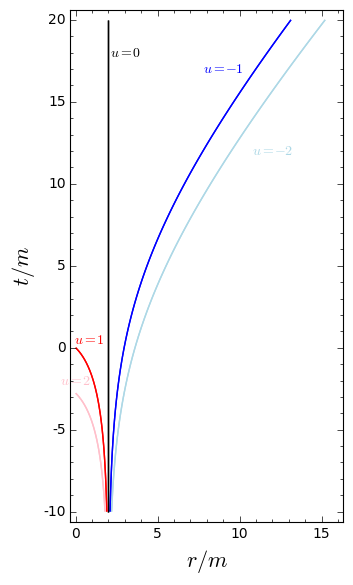

In [11]:
plm2 = implicit_plot(u.expr().subs(m=1)+2, (r, 0, 16), (t, -10, 20), color='lightblue') + \
       text('$u=-2$', (12,12), color='lightblue')
plm1 = implicit_plot(u.expr().subs(m=1)+1, (r, 0, 16), (t, -10, 20), color='blue') + \
       text('$u=-1$', (9,17), color='blue')
pl0 = implicit_plot(u.expr().subs(m=1), (r, 0, 16), (t, -10, 20), color='black') + \
       text('$u=0$', (3, 18), color='black') 
pl1 = implicit_plot(u.expr().subs(m=1)-1, (r, 0, 16), (t, -10, 20), color='red')  + \
       text('$u=1$', (0.8, 0.5), color='red') 
pl2 = implicit_plot(u.expr().subs(m=1)-2, (r, 0, 16), (t, -10, 20), color='pink')  + \
       text('$u=2$', (0, -2), color='pink') 
graph = plm2+plm1+pl0+pl1+pl2
show(graph, aspect_ratio=True, axes_labels=[r'$r/m$', r'$t/m$'],)

In [12]:
du = u.differential()
print du
du.display()

1-form du on the 4-dimensional differentiable manifold M


du = -1/8*(2*m - r)*e^(1/4*r/m - 1/4*t/m)/m^2 dt - 1/8*(2*m + r)*e^(1/4*r/m - 1/4*t/m)/m^2 dr

In [13]:
grad_u = du.up(g)
print grad_u
grad_u.display()

Vector field on the 4-dimensional differentiable manifold M


-1/8*(2*m + r)*e^(1/4*r/m - 1/4*t/m)/m^2 d/dt + 1/8*(2*m - r)*e^(1/4*r/m - 1/4*t/m)/m^2 d/dr

Let us check that each hypersurface $u={\rm const}$ is a null hypersurface:

In [14]:
g(grad_u, grad_u).expr()

0

## The null normal $\ell$

In [15]:
rho = - log(-grad_u[[0]])
print rho
rho.display()

Scalar field on the 4-dimensional differentiable manifold M


M --> R
(t, r, th, ph) |--> 1/4*(12*m*log(2) - 4*m*log(2*m + r) + 8*m*log(m) - r + t)/m

In [16]:
l = - exp(rho) * grad_u
l.set_name('l', latex_name=r'\ell')
print l
l.display()

Vector field l on the 4-dimensional differentiable manifold M


l = d/dt - (2*m - r)/(2*m + r) d/dr

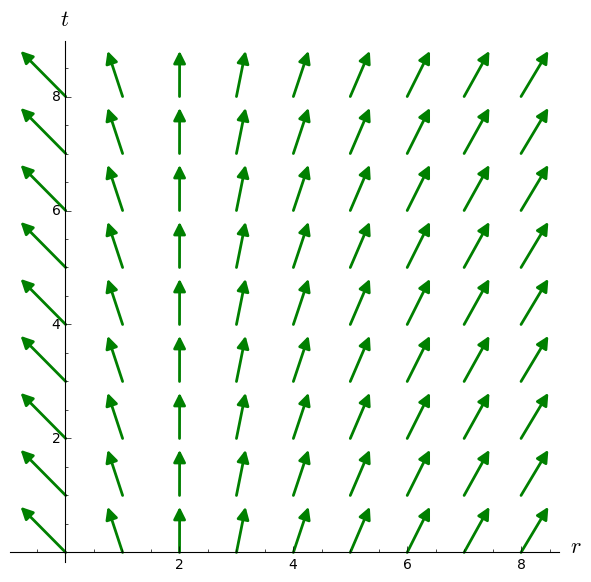

In [17]:
graph_l = l.plot(ambient_coords=(r,t), ranges={r:(0.01,8), t:(0,8)}, fixed_coords={th:pi/2, ph:pi}, 
                 parameters={m:1}, color='green', scale=0.8, aspect_ratio=1)
show(graph_l)

Let us check that $\ell$ is a null vector everywhere:

In [18]:
g(l,l).expr()

0

In [19]:
l_form = l.down(g)
l_form.set_name('lf', latex_name=r'\underline{\ell}')
print l_form
l_form.display()

1-form lf on the 4-dimensional differentiable manifold M


lf = (2*m - r)/(2*m + r) dt + dr

In [20]:
nab = g.connection()
print nab
nab

Levi-Civita connection nabla_g associated with the Lorentzian metric g on the 4-dimensional differentiable manifold M


Levi-Civita connection nabla_g associated with the Lorentzian metric g on the 4-dimensional differentiable manifold M

In [21]:
nab_l_form = nab(l_form)
nab_l_form.display()

nabla_g(lf) = (2*m^2 - m*r)/(2*m*r^2 + r^3) dt*dt + (4*m^3 + 4*m^2*r - 3*m*r^2)/(4*m^2*r^2 + 4*m*r^3 + r^4) dt*dr + m/r^2 dr*dt + (2*m^2 + 3*m*r)/(2*m*r^2 + r^3) dr*dr - (2*m*r - r^2)/(2*m + r) dth*dth - (2*m*r - r^2)*sin(th)^2/(2*m + r) dph*dph

In [22]:
nab_l_form.symmetrize().display()

(2*m^2 - m*r)/(2*m*r^2 + r^3) dt*dt + (4*m^3 + 4*m^2*r - m*r^2)/(4*m^2*r^2 + 4*m*r^3 + r^4) dt*dr + (4*m^3 + 4*m^2*r - m*r^2)/(4*m^2*r^2 + 4*m*r^3 + r^4) dr*dt + (2*m^2 + 3*m*r)/(2*m*r^2 + r^3) dr*dr - (2*m*r - r^2)/(2*m + r) dth*dth - (2*m*r - r^2)*sin(th)^2/(2*m + r) dph*dph

Check of the identity $\ell^\mu \nabla_\alpha \ell_\mu=0$:

In [23]:
v = l.contract(nab_l_form, 0)
v.display()

0

## The null normal as a pregeodesic vector field

In [24]:
nab_l = nab(l)
nab_l[:]

[                                                   m/r^2                          (2*m^2 + 3*m*r)/(2*m*r^2 + r^3)                                                        0                                                        0]
[                          -(2*m^2 - m*r)/(2*m*r^2 + r^3) -(4*m^3 + 4*m^2*r - 3*m*r^2)/(4*m^2*r^2 + 4*m*r^3 + r^4)                                                        0                                                        0]
[                                                       0                                                        0                                 -(2*m - r)/(2*m*r + r^2)                                                        0]
[                                                       0                                                        0                                                        0                                 -(2*m - r)/(2*m*r + r^2)]

In [25]:
div_l = nab_l.trace()
print div_l
div_l.display()

Scalar field on the 4-dimensional differentiable manifold M


M --> R
(t, r, th, ph) |--> -2*(4*m^2 - 2*m*r - r^2)/(4*m^2*r + 4*m*r^2 + r^3)

In [26]:
div_l.expr().factor()

-2*(4*m^2 - 2*m*r - r^2)/((2*m + r)^2*r)

In [27]:
div_l.expr().subs(r=2*m)

1/4/m

In [28]:
acc_l = l.contract(0,nab_l,1)
print acc_l
acc_l.display()

Vector field on the 4-dimensional differentiable manifold M


4*m/(4*m^2 + 4*m*r + r^2) d/dt - 4*(2*m^2 - m*r)/(8*m^3 + 12*m^2*r + 6*m*r^2 + r^3) d/dr

The non-affinity parameter $\kappa$:

In [29]:
kappa = l(rho)
kappa.display()

M --> R
(t, r, th, ph) |--> 4*m/(4*m^2 + 4*m*r + r^2)

Check of the pregeodesic equation $\nabla_{\ell} \ell = \kappa \ell$:

In [30]:
acc_l == kappa * l

True

In [31]:
kappa.expr().factor()

4*m/(2*m + r)^2

Value of $\kappa$ on the horizon:

In [32]:
kappaH = kappa.expr().subs(r=2*m)
kappaH

1/4/m

## The complementary null vector field $k$

In [33]:
k = M.vector_field(name='k')
k[0] = 1/2 + m/r
k[1] = -1/2 - m/r
k.display()

k = 1/2*(2*m + r)/r d/dt - 1/2*(2*m + r)/r d/dr

In [34]:
g(k,k).expr()

0

In [35]:
g(k,l).expr()

-1

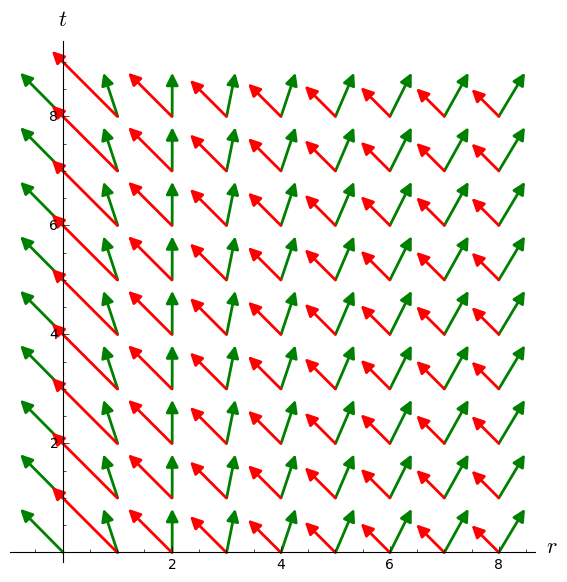

In [36]:
graph_k = k.plot(ambient_coords=(r,t), ranges={r:(1,8), t:(0,8)}, nb_values={r:8, t:9}, fixed_coords={th:pi/2, ph:pi}, 
                 parameters={m:1}, color='red', scale=0.8, aspect_ratio=1)
graph_lk = graph_l+graph_k
show(graph_lk)
graph_lk.save('def_plot_lk.pdf')

In [37]:
k_form = k.down(g)
k_form.set_name('kf', latex_name=r'\underline{k}')
k_form.display()

kf = -1/2*(2*m + r)/r dt - 1/2*(2*m + r)/r dr

## The 2-metric $q$

We define $q = g + \underline{\ell}\otimes \underline{k} + \underline{k}\otimes \underline{\ell}$:

In [38]:
q = g + l_form*k_form + k_form*l_form
q.set_name('q')
q.display()

q = r^2 dth*dth + r^2*sin(th)^2 dph*dph

In [39]:
q_up = q.up(g)
print q_up
q_up.display()

Tensor field of type (2,0) on the 4-dimensional differentiable manifold M


r^(-2) d/dth*d/dth + 1/(r^2*sin(th)^2) d/dph*d/dph

## Expansion along the null normal

We compute $\theta_{(\ell)}$ as $\theta_{(\ell)} = q^{\mu\nu}\nabla_\mu \ell_\nu$:

In [40]:
theta = q_up.contract(0,1,nab(l_form),0,1)
theta.expr()

-2*(2*m - r)/(2*m*r + r^2)

Check of the formula $\theta_{(\ell)} = \nabla\cdot\ell - \kappa$:

In [41]:
theta == div_l - kappa

True

Check of the forumla $\theta_{(\ell)} = \frac{1}{2} \mathcal{L}_{\ell} \ln \det q$:

In [42]:
detq = M.scalar_field({X: r^4*sin(th)^2})
theta == 1/2*ln(detq).lie_der(l)

True

In [43]:
theta == 1/2*l(ln(detq))

True

## Deformation rate tensor of the cross-sections

We compute $\Theta$ as $\Theta = \frac{1}{2} \mathcal{L}_{\ell} q$:

In [44]:
Theta = 1/2 * q.lie_der(l)
Theta.set_name('Theta', latex_name=r'\Theta')
print Theta
Theta.display()

Tensor field Theta of type (0,2) on the 4-dimensional differentiable manifold M


Theta = -(2*m*r - r^2)/(2*m + r) dth*dth - (2*m*r - r^2)*sin(th)^2/(2*m + r) dph*dph

## Expansion of the cross-sections along the null normal $k$:

We compute $\theta_{(k)}$ as $\theta_{(k)} = q^{\mu\nu}\nabla_\mu k_\nu$:

In [45]:
theta_k = q_up.contract(0,1,nab(k_form),0,1)
theta_k.expr()

-(2*m + r)/r^2

Value of $\theta_{(k)}$ at the horizon:

In [46]:
theta_k.expr().subs(r=2*m)

-1/m